In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL
import PIL.Image
from PIL import Image
import tensorflow_datasets as tfds
from tensorflow.keras import *
import tensorboard
from tensorflow.keras.utils import *
import os

# def get_image_data(subset):
#     raw_data_set = \
#     tf.keras.preprocessing.image_dataset_from_directory(
#         '/content/gdrive/MyDrive/dataset/train',
#         color_mode = 'grayscale',
#         seed=123,
#         validation_split=0.2,
#         subset=subset,
#         label_mode = 'categorical',
#         image_size = (256, 256)
#     )

#     raw_data_set.class_names.sort()

#     return raw_data_set

# training_ds = get_image_data(
#     subset = "training"
# )
# validation_ds = get_image_data(
#     subset = "validation"
# )

# For demonstration, iterate over the batches yielded by the dataset.
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         print(labels[i][0])
#         plt.axis("off")

# for data, labels in ds:
#    print(data.shape)  # (64, 200, 200, 3)
#    print(data.dtype)  # float32
#    print(labels.shape)  # (64,)
#    print(labels.dtype)  # int32
#train_ds.class_names.sort()
# print(training_ds['classNames'])
classes_labels = ['bald_eagle' , 'elk' , 'racoon' , 'raven']
enc = pd.get_dummies(pd.Series((classes_labels)))
# print(enc)
eagle_len = len(os.listdir('/content/gdrive/MyDrive/dataset/train/bald_eagle'))
elk_len = len(os.listdir('/content/gdrive/MyDrive/dataset/train/elk'))
racoon_len = len(os.listdir('/content/gdrive/MyDrive/dataset/train/racoon'))
raven_len = len(os.listdir('/content/gdrive/MyDrive/dataset/train/raven'))
anim_lt = [eagle_len , elk_len , racoon_len , raven_len]

In [ ]:
# image_shape = (256,256) + (1,)
# preprocessing_layers = [
#     tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=image_shape)
# ]

In [ ]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255.0 ,
    validation_split = 0.2
)

Found 1049 images belonging to 4 classes.
Found 261 images belonging to 4 classes.
4
{'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}


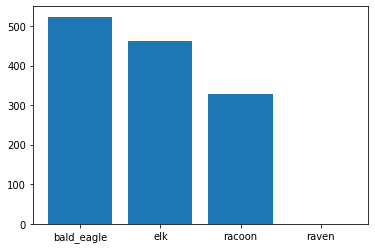

In [ ]:
TrainData = dataGenerator.flow_from_directory(
    directory = '/content/gdrive/MyDrive/dataset/train' ,
    color_mode = 'grayscale',
    subset='training',
    shuffle = True ,
    class_mode='categorical'
)
TestData = dataGenerator.flow_from_directory(
    directory = '/content/gdrive/MyDrive/dataset/train' ,
    color_mode = 'grayscale',
    subset='validation',
    shuffle = True ,
    class_mode='categorical'
)
print(TrainData.num_classes)
print(TrainData.class_indices)
plt.bar( list(TrainData.class_indices) , anim_lt )
plt.show()

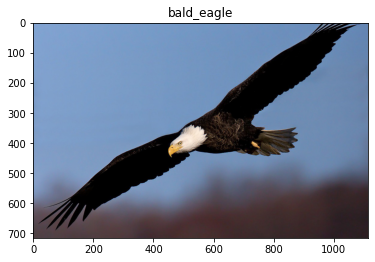

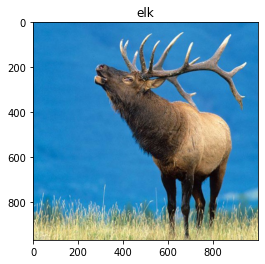

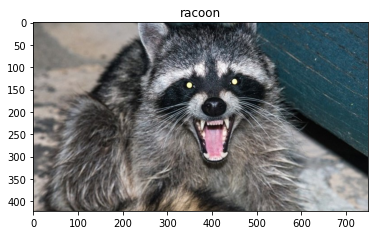

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/dataset/train/bald_eagle/1a73c83d2aefcaee85.jpg')
imgplot = plt.imshow(img)
plt.title('bald_eagle')
plt.show()
img = mpimg.imread('/content/gdrive/MyDrive/dataset/train/elk/0eb855f3e53a7995f9.jpg')
imgplot = plt.imshow(img)
plt.title('elk')
plt.show()
img = mpimg.imread('/content/gdrive/MyDrive/dataset/train/racoon/002c3a60a6c763cdb5.jpg')
imgplot = plt.imshow(img)
plt.title('racoon')
plt.show()
# img = mpimg.imread('/content/gdrive/MyDrive/dataset/train/raven/1a65308d6d49c6fcb4.jpg')
# imgplot = plt.imshow(img)
# plt.title('raven')
# plt.show()

In [ ]:
input = layers.Input(shape=(256,256,1))

output = layers.Flatten()(input)
output = layers.Dense(300 , activation = 'relu')(output)
output = layers.Dense(300 , activation = 'relu')(output)
output = layers.Dense(4 , activation = 'softmax')(output)



In [ ]:
model = models.Model(inputs = input , outputs = output)

In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

In [ ]:
model.compile(optimizers.SGD(learning_rate = 0.01) , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 300)               19661100  
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 4)                 1204      
                                                                 
Total params: 19,752,604
Trainable params: 19,752,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(TrainData , validation_data = TestData , epochs=10)

Epoch 1/10
33/33 [==============================] - 44s 1s/step - loss: 1.0805 - accuracy: 0.3994 - recall_7: 0.0057 - precision_7: 1.0000 - f1_score: 0.1451 - val_loss: 1.0819 - val_accuracy: 0.3985 - val_recall_7: 0.0038 - val_precision_7: 1.0000 - val_f1_score: 0.1425
Epoch 2/10
33/33 [==============================] - 42s 1s/step - loss: 1.0802 - accuracy: 0.3994 - recall_7: 0.0057 - precision_7: 1.0000 - f1_score: 0.1451 - val_loss: 1.0818 - val_accuracy: 0.3985 - val_recall_7: 0.0038 - val_precision_7: 1.0000 - val_f1_score: 0.1425
Epoch 3/10
33/33 [==============================] - 42s 1s/step - loss: 1.0802 - accuracy: 0.3994 - recall_7: 0.0057 - precision_7: 1.0000 - f1_score: 0.1451 - val_loss: 1.0817 - val_accuracy: 0.3985 - val_recall_7: 0.0038 - val_precision_7: 1.0000 - val_f1_score: 0.1425
Epoch 4/10
33/33 [==============================] - 42s 1s/step - loss: 1.0801 - accuracy: 0.3994 - recall_7: 0.0057 - precision_7: 1.0000 - f1_score: 0.1451 - val_loss: 1.0815 - val_a

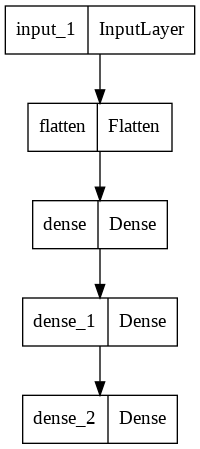

In [ ]:
utils.plot_model(model)

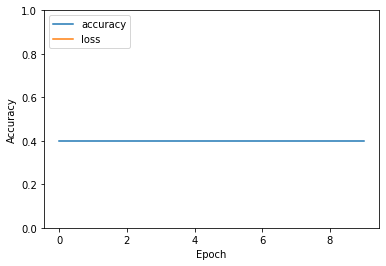

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# # predict probabilities for test set
# yhat_probs = model.predict(TrainData, verbose=0)
# # predict crisp classes for test set
# yhat_classes1 = model.predict(TrainData, verbose=0)
# yhat_classes = np.argmax(yhat_classes1,axis=1)
# # reduce to 1d array
# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(TrainData, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(TrainData, yhat_classes)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(TrainData, yhat_classes)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(TrainData, yhat_classes)
# print('F1 score: %f' % f1)

In [ ]:
model2 = models.Model(inputs = input , outputs = output)

In [ ]:
model2.compile(optimizers.SGD(learning_rate = 0.01 , momentum=0.5) , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model2.fit(TrainData , validation_data = TestData , epochs=10)

Epoch 1/10
33/33 [==============================] - 45s 1s/step - loss: 1.6194 - accuracy: 0.3603 - recall_8: 0.1592 - precision_8: 0.3599 - f1_score: 0.2519 - val_loss: 1.0829 - val_accuracy: 0.4330 - val_recall_8: 0.0000e+00 - val_precision_8: 0.0000e+00 - val_f1_score: 0.1998
Epoch 2/10
33/33 [==============================] - 42s 1s/step - loss: 1.0998 - accuracy: 0.4099 - recall_8: 0.1211 - precision_8: 0.5000 - f1_score: 0.2565 - val_loss: 1.1029 - val_accuracy: 0.3372 - val_recall_8: 0.0077 - val_precision_8: 1.0000 - val_f1_score: 0.2478
Epoch 3/10
33/33 [==============================] - 42s 1s/step - loss: 1.0812 - accuracy: 0.4337 - recall_8: 0.1792 - precision_8: 0.5151 - f1_score: 0.2845 - val_loss: 1.0598 - val_accuracy: 0.4215 - val_recall_8: 0.0230 - val_precision_8: 0.8571 - val_f1_score: 0.3118
Epoch 4/10
33/33 [==============================] - 42s 1s/step - loss: 1.0350 - accuracy: 0.4681 - recall_8: 0.2078 - precision_8: 0.5752 - f1_score: 0.3209 - val_loss: 1.0410

In [ ]:
model3 = models.Model(inputs = input , outputs = output)

In [ ]:
model3.compile(optimizers.SGD(learning_rate = 0.01 , momentum=0.9) , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model3.fit(TrainData , validation_data = TestData , epochs=10)

Epoch 1/10
33/33 [==============================] - 45s 1s/step - loss: 1.1837 - accuracy: 0.4423 - recall_9: 0.2469 - precision_9: 0.4823 - f1_score: 0.3076 - val_loss: 1.0527 - val_accuracy: 0.5057 - val_recall_9: 0.1073 - val_precision_9: 0.8000 - val_f1_score: 0.2889
Epoch 2/10
33/33 [==============================] - 42s 1s/step - loss: 1.0405 - accuracy: 0.4976 - recall_9: 0.2831 - precision_9: 0.5789 - f1_score: 0.3208 - val_loss: 1.0236 - val_accuracy: 0.4483 - val_recall_9: 0.1686 - val_precision_9: 0.6377 - val_f1_score: 0.2616
Epoch 3/10
33/33 [==============================] - 42s 1s/step - loss: 1.0252 - accuracy: 0.4500 - recall_9: 0.2612 - precision_9: 0.5892 - f1_score: 0.3166 - val_loss: 0.9762 - val_accuracy: 0.5019 - val_recall_9: 0.1877 - val_precision_9: 0.7313 - val_f1_score: 0.3608
Epoch 4/10
33/33 [==============================] - 42s 1s/step - loss: 1.0261 - accuracy: 0.4843 - recall_9: 0.3184 - precision_9: 0.5839 - f1_score: 0.3267 - val_loss: 1.1917 - val_a

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
model.compile(optimizers.Adam() , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model.fit(TrainData , validation_data = TestData , epochs=10 )

Epoch 1/10
33/33 [==============================] - 45s 1s/step - loss: 1.0802 - accuracy: 0.3804 - recall_10: 0.0057 - precision_10: 1.0000 - f1_score: 0.1927 - val_loss: 1.0861 - val_accuracy: 0.3985 - val_recall_10: 0.0038 - val_precision_10: 0.5000 - val_f1_score: 0.1425
Epoch 2/10
33/33 [==============================] - 43s 1s/step - loss: 1.0804 - accuracy: 0.3994 - recall_10: 0.0067 - precision_10: 0.7778 - f1_score: 0.1451 - val_loss: 1.0805 - val_accuracy: 0.3985 - val_recall_10: 0.0038 - val_precision_10: 1.0000 - val_f1_score: 0.1425
Epoch 3/10
33/33 [==============================] - 43s 1s/step - loss: 1.0782 - accuracy: 0.3994 - recall_10: 0.0057 - precision_10: 1.0000 - f1_score: 0.1451 - val_loss: 1.0782 - val_accuracy: 0.3985 - val_recall_10: 0.0038 - val_precision_10: 1.0000 - val_f1_score: 0.1425
Epoch 4/10
33/33 [==============================] - 43s 1s/step - loss: 1.0768 - accuracy: 0.3994 - recall_10: 0.0057 - precision_10: 1.0000 - f1_score: 0.1451 - val_loss: 

In [ ]:
history = model.fit(TrainData , validation_data = TestData , epochs=20 , callbacks=[es])

Epoch 1/20
33/33 [==============================] - 44s 1s/step - loss: 1.0770 - accuracy: 0.3994 - recall_10: 0.0057 - precision_10: 1.0000 - f1_score: 0.1451 - val_loss: 1.0772 - val_accuracy: 0.3985 - val_recall_10: 0.0038 - val_precision_10: 1.0000 - val_f1_score: 0.1425
Epoch 2/20
33/33 [==============================] - 43s 1s/step - loss: 1.0769 - accuracy: 0.3994 - recall_10: 0.0057 - precision_10: 1.0000 - f1_score: 0.1451 - val_loss: 1.0773 - val_accuracy: 0.3985 - val_recall_10: 0.0038 - val_precision_10: 1.0000 - val_f1_score: 0.1425
Epoch 00002: early stopping


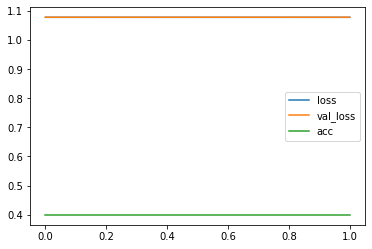

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='acc')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizers.Adam() , loss='mean_squared_error' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model.fit(TrainData , validation_data = TestData , epochs=20 , callbacks=[es])

Epoch 1/20
33/33 [==============================] - 46s 1s/step - loss: 0.1632 - accuracy: 0.3765 - recall_11: 0.0057 - precision_11: 1.0000 - f1_score: 0.1633 - val_loss: 0.1632 - val_accuracy: 0.3985 - val_recall_11: 0.0038 - val_precision_11: 1.0000 - val_f1_score: 0.1425
Epoch 2/20
33/33 [==============================] - 43s 1s/step - loss: 0.1631 - accuracy: 0.3994 - recall_11: 0.0057 - precision_11: 1.0000 - f1_score: 0.1451 - val_loss: 0.1633 - val_accuracy: 0.3985 - val_recall_11: 0.0038 - val_precision_11: 1.0000 - val_f1_score: 0.1425
Epoch 00002: early stopping


In [ ]:
from keras.regularizers import l2
input = layers.Input(shape=(256,256,1))

output = layers.Flatten()(input)
output = layers.Dense(300 , activation = 'relu' , kernel_regularizer=l2(0.001))(output)
output = layers.Dense(300 , activation = 'relu' , kernel_regularizer=l2(0.001))(output)
output = layers.Dense(4 , activation = 'softmax')(output)


In [ ]:
model_regs = models.Model(inputs = input , outputs = output)

In [ ]:
model_regs.compile(optimizers.Adam() , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model_regs.fit(TrainData , validation_data = TestData , epochs=20 )

Epoch 1/20
33/33 [==============================] - 47s 1s/step - loss: 22.9027 - accuracy: 0.3518 - recall_12: 0.3413 - precision_12: 0.3531 - f1_score: 0.2561 - val_loss: 4.1073 - val_accuracy: 0.5057 - val_recall_12: 0.5019 - val_precision_12: 0.5078 - val_f1_score: 0.2822
Epoch 2/20
33/33 [==============================] - 45s 1s/step - loss: 6.3767 - accuracy: 0.4280 - recall_12: 0.4233 - precision_12: 0.4290 - f1_score: 0.3076 - val_loss: 3.4587 - val_accuracy: 0.4368 - val_recall_12: 0.4330 - val_precision_12: 0.4363 - val_f1_score: 0.2372
Epoch 3/20
33/33 [==============================] - 45s 1s/step - loss: 2.3619 - accuracy: 0.5310 - recall_12: 0.5033 - precision_12: 0.5382 - f1_score: 0.3895 - val_loss: 1.7848 - val_accuracy: 0.5441 - val_recall_12: 0.4023 - val_precision_12: 0.5801 - val_f1_score: 0.4070
Epoch 4/20
33/33 [==============================] - 45s 1s/step - loss: 1.9493 - accuracy: 0.5300 - recall_12: 0.4957 - precision_12: 0.5503 - f1_score: 0.3875 - val_loss:

In [ ]:
input = layers.Input(shape=(256,256,1))

output = layers.Flatten()(input)
output = layers.Dense(300 , activation = 'relu' )(output)
output = layers.Dropout(0.1) (output)
output = layers.Dense(300 , activation = 'relu' )(output)
output = layers.Dropout(0.1) (output)
output = layers.Dense(4 , activation = 'softmax')(output)

In [ ]:
model_dp =models.Model(inputs = input , outputs = output)
model_dp.compile(optimizers.Adam() , loss='categorical_crossentropy' , metrics = ["accuracy" , tf.keras.metrics.Recall() , tf.keras.metrics.Precision() , tfa.metrics.F1Score(4)])

In [ ]:
history = model_dp.fit(TrainData , validation_data = TestData , epochs=20 )

Epoch 1/20
33/33 [==============================] - 45s 1s/step - loss: 1.2217 - accuracy: 0.4318 - recall_13: 0.3184 - precision_13: 0.4526 - f1_score: 0.3032 - val_loss: 1.0303 - val_accuracy: 0.5326 - val_recall_13: 0.2950 - val_precision_13: 0.6063 - val_f1_score: 0.3058
Epoch 2/20
33/33 [==============================] - 43s 1s/step - loss: 1.0389 - accuracy: 0.4786 - recall_13: 0.2660 - precision_13: 0.5987 - f1_score: 0.3353 - val_loss: 0.9816 - val_accuracy: 0.5785 - val_recall_13: 0.3908 - val_precision_13: 0.6145 - val_f1_score: 0.3295
Epoch 3/20
33/33 [==============================] - 43s 1s/step - loss: 0.9342 - accuracy: 0.5596 - recall_13: 0.3727 - precision_13: 0.6800 - f1_score: 0.3704 - val_loss: 0.9423 - val_accuracy: 0.5517 - val_recall_13: 0.3640 - val_precision_13: 0.6250 - val_f1_score: 0.3517
Epoch 4/20
33/33 [==============================] - 43s 1s/step - loss: 1.0628 - accuracy: 0.4623 - recall_13: 0.2545 - precision_13: 0.5621 - f1_score: 0.3330 - val_loss: 

In [ ]:
CA5 Phase2
Mohamad araghi                  810198436
In this assignment we will implement a neural network by using tensorflow and keras libraries ,
which can give us many diffrent options for implemebting our neural network .
We have a dataset including 4 folders : bald_eagle , elk , racoon and reaven
which eachone includes a number of rgb images that can be used for both training and validating our
nn and get accuracy and said values to see how good is it working .

In phase 2 , first we are using a SGD optimizer with learning rate of 0.01 and
10 epochs . We have 2 relu layers and a softmax layer in the end and for image size
we are using (256,256) size and we have the default batch_size of 32 .
And for writing parameters values we are using keras options like recall and precision
and f1 score and also some callbacks like earlystop which we will see later.

Our model summary and all needed values can be seen in our code output.

Our data is normalized in first and includes values between 0 and 1 cause we use
split of 1/255 and we will read it from directory by using keras commands and
generators. We grayscale our images there and also by setting categorial labe_mode
or using normal onehot encoding we can encode our labels so we can use it . And also by
doing that we will not have an order which is good cause our data does not have order .

Part1 : Optimizer

Neural network momentum is a technique for improving training speed and accuracy.
Momentum is a parameter between 0 and 1 and for value 0.5 we can see
that there is a little bit improve in our accuracy but not much , but for momentum of 0.9 we
get less accuracy cause the model keeps missing the optimal value and goes around it.
Low momentum is not good either cause it can cause local minima problem.
So increasin momentum doesn't always work better and there is an optimal amount for
it that can help our model improve .

Adam optimizer
Adam is a replacement optimization algorithm for stochastic gradient descent for
training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms
to provide an optimization algorithm that can handle sparse gradients on noisy problems.
Adam is the best among the adaptive optimizers in most of the cases. Good with
sparse data: the adaptive learning rate is perfect for this type of datasets.
We can get a little bit better accuracy with adam and also better speed than SGD using
default value of Adam (0.001) .
So we can get that in cases SGD can perform better but Adam can perform faster depending
on our dataset .


Part2 : epoch

An epoch is a term used in machine learning and indicates the number of passes of the entire
training dataset the machine learning algorithm has completed. Datasets are usually grouped
into batches (especially when the amount of data is very large). Some people use the term iteration
loosely and refer to putting one batch through the model as an iteration.
If the batch size is the whole training dataset then the number of epochs is
the number of iterations. For practical reasons, this is usually not the case.
Many models are created with more than one epoch. The general relation where dataset size is d,
number of epochs is e, number of iterations is i, and batch size is b would be d*e = i*b.
Determining how many epochs a model should run to train is based on many parameters related
to both the data itself and the goal of the model, and while there have been efforts to turn
this process into an algorithm, often a deep understanding of the data itself is indispensable.
Using muptiple epochs
We want to get good performance on non-training data (in practice this can be approximated with a hold-out set);
usually (but not always) that takes more than one pass over the training data.
Additionally, and independent of any out-of-sample considerations, it's typical that
gradient descent doesn't reach a (global or local) minimum after the first epoch. For any
problem, there's no reason to believe that the number of updates required to reach a minimum
happens to coincide with the number of mini-batches in your data set.
This observation isn't unique to neural networks, but is common to all
iterative model estimation procedures. For example, logistic regression,
SVM and gradient boosting all use multiple rounds of updates to estimate models.

Using more epochs can give us more accuracy but it can cause lower speed and also
overfiting which we know is not good and we don't want it to happen .
We can stop our model when overfitting is starting by monitoring our parameters using keras monitoring
and for example val_loss amount and we can try to minimise it . So an early stop might happen
when overfitting starts .

Part3 : Loss Function

We can can see that MSE (mean square function) is not a proper loss function for our case.
It tries to minimum the error as other loss functions but
MSE is usually used in regression problems, where our output has a continous domain.
Not in classification problems . Therefore, MSE does not provide much
information on how well our model has performed and how weights matrices need to be changed to
improve its performance.
in our dataset , we will see only a bit difference and not much of a change in our
accuracy and parameters .

Part4 : Regularization
Regularizers allow you to apply penalties on layer parameters or layer activity during optimization.
These penalties are summed into the loss function that the network optimizes.
Regularization penalties are applied on a per-layer basis.
It is common to seek sparse learned representations in autoencoders, called sparse autoencoders,
and in encoder-decoder models, although the approach can also be used
generally to reduce overfitting and improve a model’s ability to generalize to new observations.

The simplest and perhaps most common regularization method is to add a penalty to the
loss function in proportion to the size of the weights in the model.
Weight Regularization (weight decay): Penalize the model during training based
on the magnitude of the weights.
This will encourage the model to map the inputs to the outputs of the training dataset
in such a way that the weights of the model are kept small.
This approach is called weight regularization or weight decay and has
proven very effective for decades for both simpler linear models and neural networks .

Dropout: Probabilistically remove inputs during training.
A new hyperparameter is introduced that specifies the probability at which outputs
of the layer are dropped out, or inversely, the probability at which outputs of
the layer are retained. The interpretation is an implementation detail that can
differ from paper to code library.
A common value is a probability of 0.5 for retaining the output of each node
in a hidden layer and a value close to 1.0, such as 0.8,
for retaining inputs from the visible layer.
The weights of the network will be larger than normal because of dropout. Therefore,
before finalizing the network, the weights are first scaled by the chosen dropout rate.
The network can then be used as per normal to make predictions.

We will get a huge difference in regularization method and get much better accuracy
and other parameters and also not get into overfitting as expected.
Dropout will improve our model a little bit too but not as much as
regularization .

The best values we got for an epoch was when we used Adam ,
20 epochs and regularization with this values :

Epoch 16/20
33/33 [==============================] - 44s 1s/step - loss: 0.7796 - accuracy: 0.8494 - recall_12: 0.8112
- precision_12: 0.8902 - f1_score: 0.6334 - val_loss: 1.2305 - val_accuracy: 0.6973 - val_recall_12: 0.6475
- val_precision_12: 0.7191 - val_f1_score: 0.4806




CA5 Phase2 <br>
Mohamad araghi                  810198436 <br>
In this assignment we will implement a neural network by using tensorflow and keras libraries ,
which can give us many diffrent options for implemebting our neural network .
We have a dataset including 4 folders : bald_eagle , elk , racoon and reaven
which eachone includes a number of rgb images that can be used for both training and validating our
nn and get accuracy and said values to see how good is it working .

In phase 2 , first we are using a SGD optimizer with learning rate of 0.01 and
10 epochs . We have 2 relu layers and a softmax layer in the end and for image size
we are using (256,256) size and we have the default batch_size of 32 .
And for writing parameters values we are using keras options like recall and precision
and f1 score and also some callbacks like earlystop which we will see later.

Our model summary and all needed values can be seen in our code output.

Our data is normalized in first and includes values between 0 and 1 cause we use
split of 1/255 and we will read it from directory by using keras commands and
generators. We grayscale our images there and also by setting categorial labe_mode
or using normal onehot encoding we can encode our labels so we can use it . And also by
doing that we will not have an order which is good cause our data does not have order .

Part1 : Optimizer

Neural network momentum is a technique for improving training speed and accuracy.
Momentum is a parameter between 0 and 1 and for value 0.5 we can see
that there is a little bit improve in our accuracy but not much , but for momentum of 0.9 we
get less accuracy cause the model keeps missing the optimal value and goes around it.
Low momentum is not good either cause it can cause local minima problem.
So increasin momentum doesn't always work better and there is an optimal amount for
it that can help our model improve .

Adam optimizer
Adam is a replacement optimization algorithm for stochastic gradient descent for
training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms
to provide an optimization algorithm that can handle sparse gradients on noisy problems.
Adam is the best among the adaptive optimizers in most of the cases. Good with
sparse data: the adaptive learning rate is perfect for this type of datasets.
We can get a little bit better accuracy with adam and also better speed than SGD using
default value of Adam (0.001) .
So we can get that in cases SGD can perform better but Adam can perform faster depending
on our dataset .


Part2 : epoch

An epoch is a term used in machine learning and indicates the number of passes of the entire
training dataset the machine learning algorithm has completed. Datasets are usually grouped
into batches (especially when the amount of data is very large). Some people use the term iteration
loosely and refer to putting one batch through the model as an iteration.   
If the batch size is the whole training dataset then the number of epochs is
the number of iterations. For practical reasons, this is usually not the case.
Many models are created with more than one epoch. The general relation where dataset size is d,
number of epochs is e, number of iterations is i, and batch size is b would be d*e = i*b.
Determining how many epochs a model should run to train is based on many parameters related
to both the data itself and the goal of the model, and while there have been efforts to turn
this process into an algorithm, often a deep understanding of the data itself is indispensable.
Using muptiple epochs
We want to get good performance on non-training data (in practice this can be approximated with a hold-out set);
usually (but not always) that takes more than one pass over the training data.
Additionally, and independent of any out-of-sample considerations, it's typical that
gradient descent doesn't reach a (global or local) minimum after the first epoch. For any
problem, there's no reason to believe that the number of updates required to reach a minimum
happens to coincide with the number of mini-batches in your data set.
This observation isn't unique to neural networks, but is common to all
iterative model estimation procedures. For example, logistic regression,
SVM and gradient boosting all use multiple rounds of updates to estimate models.

Using more epochs can give us more accuracy but it can cause lower speed and also
overfiting which we know is not good and we don't want it to happen .
We can stop our model when overfitting is starting by monitoring our parameters using keras monitoring
and for example val_loss amount and we can try to minimise it . So an early stop might happen
when overfitting starts .

Part3 : Loss Function

We can can see that MSE (mean square function) is not a proper loss function for our case.
It tries to minimum the error as other loss functions but
MSE is usually used in regression problems, where our output has a continous domain.
Not in classification problems . Therefore, MSE does not provide much
information on how well our model has performed and how weights matrices need to be changed to
improve its performance.
in our dataset , we will see only a bit difference and not much of a change in our
accuracy and parameters .

Part4 : Regularization
Regularizers allow you to apply penalties on layer parameters or layer activity during optimization.
These penalties are summed into the loss function that the network optimizes.
Regularization penalties are applied on a per-layer basis.
It is common to seek sparse learned representations in autoencoders, called sparse autoencoders,
and in encoder-decoder models, although the approach can also be used
generally to reduce overfitting and improve a model’s ability to generalize to new observations.

The simplest and perhaps most common regularization method is to add a penalty to the
loss function in proportion to the size of the weights in the model.
Weight Regularization (weight decay): Penalize the model during training based
on the magnitude of the weights.
This will encourage the model to map the inputs to the outputs of the training dataset
in such a way that the weights of the model are kept small.
This approach is called weight regularization or weight decay and has
proven very effective for decades for both simpler linear models and neural networks .

Dropout: Probabilistically remove inputs during training.
A new hyperparameter is introduced that specifies the probability at which outputs
of the layer are dropped out, or inversely, the probability at which outputs of
the layer are retained. The interpretation is an implementation detail that can
differ from paper to code library.
A common value is a probability of 0.5 for retaining the output of each node
in a hidden layer and a value close to 1.0, such as 0.8,
for retaining inputs from the visible layer.
The weights of the network will be larger than normal because of dropout. Therefore,
before finalizing the network, the weights are first scaled by the chosen dropout rate.
The network can then be used as per normal to make predictions.

We will get a huge difference in regularization method and get much better accuracy
and other parameters and also not get into overfitting as expected.
Dropout will improve our model a little bit too but not as much as
regularization .

The best values we got for an epoch was when we used Adam ,
20 epochs and regularization with this values :

Epoch 16/20
33/33 [==============================] - 44s 1s/step - loss: 0.7796 - accuracy: 0.8494 - recall_12: 0.8112
- precision_12: 0.8902 - f1_score: 0.6334 - val_loss: 1.2305 - val_accuracy: 0.6973 - val_recall_12: 0.6475
- val_precision_12: 0.7191 - val_f1_score: 0.4806




In [ ]:
%%shell
jupyter nbconvert --to html /content/phase2_main.ipynb

[NbConvertApp] Converting notebook /content/phase2_main.ipynb to html
[NbConvertApp] Writing 879776 bytes to /content/phase2_main.html
